In [ ]:
!pip install torchviz
!pip install torchview

import torch
import torch.nn.functional as F
from torch import nn
from torchview import draw_graph
from torchviz import make_dot

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=3c5d86f57fddcf336e5d3a7f6869c47ce8f0d3f1b2f20efc6b682417a37696a5
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
x1 = torch.tensor([1.2])
x1

tensor([1.2000])

In [ ]:
x1.requires_grad

False

In [ ]:
w1 = torch.tensor([3.0], requires_grad=True)
w1

tensor([3.], requires_grad=True)

In [ ]:
o = w1 * x1
o

tensor([3.6000], grad_fn=<MulBackward0>)

In [ ]:
x1.grad, w1.grad

(None, None)

## Backward Function
Backward function on tensor, computes the gradient for all tensors involved in the computation of that tensor provided requires_grad is set to True. These gradients are stored in the .grad attribute of the respective tensors.

In [ ]:
o.backward(retain_graph=True) # retain graph, so that pytorch does not remove the graph after backward

In [ ]:
x1.grad, w1.grad

(None, tensor([1.2000]))

## Derivative detour

$ \Large o(w_1) = x_1 \cdot w_1$

Product rule for derivation, $u = w_1, v=x_1$:

$\Large \frac{dy}{dx} = u \cdot \frac{dv}{dx} + v \cdot \frac{du}{dx} $

Applying the product rule:

$\Large \frac{do}{dw_1} = w_1 \cdot 0 + x_1 \cdot 1 = x_1 $

## Autograd & Computation Graph

Autograd builds a computation graph as you perform operations on tensors. Each node in this graph represents a tensor, and the edges represent the operations that produce new tensors. When computing gradients, Autograd traverses this graph from the output (e.g., loss) back to the input tensors, applying the chain rule of differentiation. This backward traversal allows it to compute the gradient of the loss with respect to each tensor in the graph efficiently.

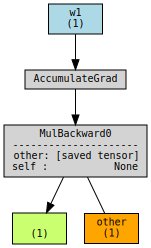

In [ ]:
make_dot(o, params={'w1': w1}, show_attrs=True, show_saved=True) # green box is x which pytorch hasent kept track of name

## Computation Graph of perceptron

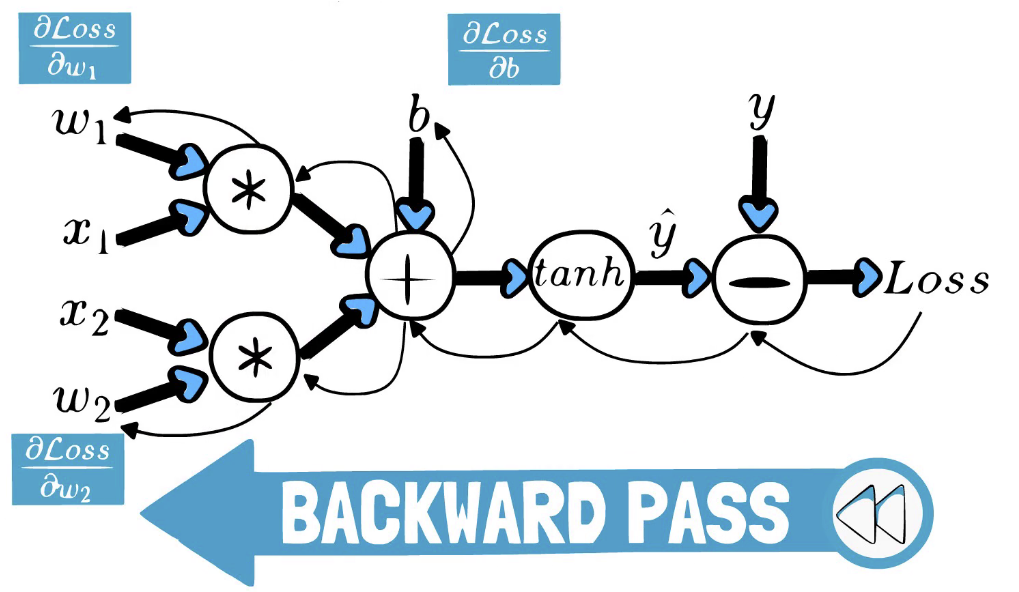

In [ ]:
x1 = torch.tensor([-1.1])
x2 = torch.tensor([2.4])

w1 = torch.tensor([0.6], requires_grad=True)
w2 = torch.tensor([1.3], requires_grad=True)
b = torch.tensor([0.2], requires_grad=True)

z = w1 * x1 + w2 * x2 + b

y_hat = torch.nn.functional.relu(z)
y_hat

tensor([2.6600], grad_fn=<ReluBackward0>)

In [ ]:
y = torch.tensor([0.5])
l = y_hat - y
l

tensor([2.1600], grad_fn=<SubBackward0>)

In [ ]:
l.backward(retain_graph=True)

In [ ]:
w1.grad, w2.grad, b.grad

(tensor([-1.1000]), tensor([2.4000]), tensor([1.]))

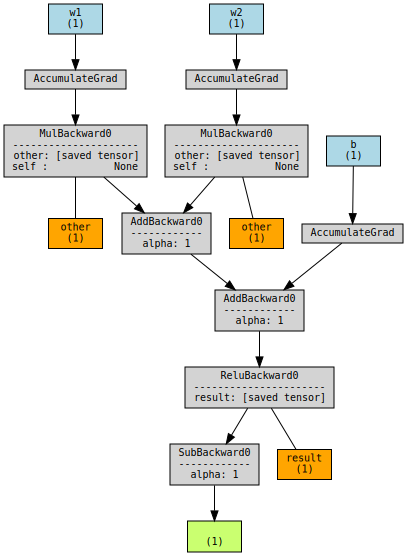

In [ ]:
make_dot(l, params={'w1': w1, 'w2': w2, 'b': b}, show_attrs=True, show_saved=True)

## Understand Derivative
A derivative, in the context of neural network training, represents the sensitivity of the loss with respect to a particular parameter. In simpler terms, it tells us how much the loss would change if we made a tiny adjustment to that parameter. If the derivative is large, it means that parameter has a significant influence on the loss.

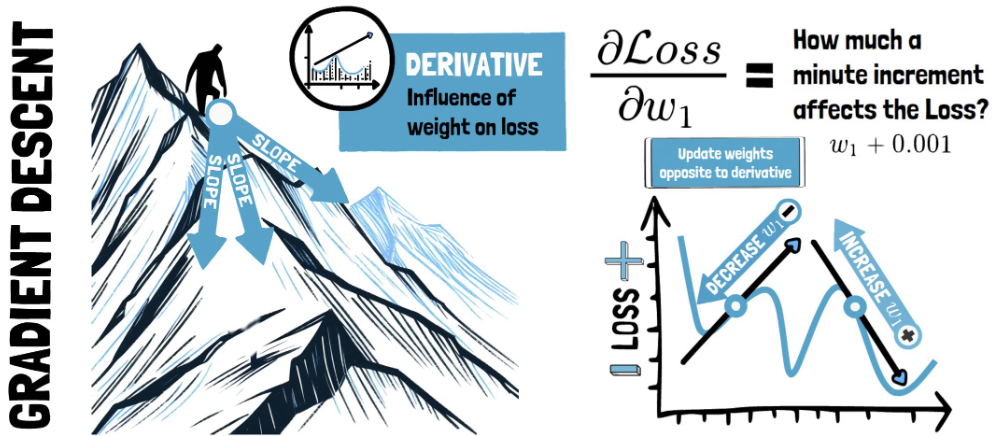

In [ ]:
x1 = torch.tensor([-1.1])
x2 = torch.tensor([2.4])

w1 = torch.tensor([0.6+0.2], requires_grad=True) # As w1 grad is negative (which means this needs to increased (- of grad)) addition will decrease loss
w2 = torch.tensor([1.3-0.1], requires_grad=True) # As w2 grad is positive (which means this needs to decrease (- of grad)) subtract will decrease loss
b = torch.tensor([0.2-0.1], requires_grad=True) # As b grad is positive (which means this needs to decrease (- of grad)) subtract will decrease loss

z = w1 * x1 + w2 * x2 + b

y_hat = torch.nn.functional.relu(z)
y = torch.tensor([0.5])
l = y_hat - y
l

tensor([1.6000], grad_fn=<SubBackward0>)

## Computation graph for MNIST MLP

In [ ]:
class MNISTNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer1 = nn.Linear(28*28, 100)
    self.Layer2 = nn.Linear(100, 150)
    self.Layer3 = nn.Linear(150, 10)

  def forward(self, x):
    x = F.relu(self.Layer1(x))
    x = F.relu(self.Layer2(x))
    x = self.Layer3(x)
    return x

In [ ]:
# Creating random tensor of MNIST dimension stretched as 1 dim
x = torch.randn(1, 28*28)
model = MNISTNet()

In [ ]:
y_hat = model(x)
y_hat

tensor([[ 0.0258,  0.1555, -0.0186, -0.1528, -0.1325,  0.2810,  0.2055,  0.1113,
         -0.0392,  0.0717]], grad_fn=<AddmmBackward0>)

## Cross Entropy Loss

Cross-entropy loss is a metric that quantifies the difference between two probability distributions. In the context of neural networks, it's commonly used to measure the dissimilarity between the predicted probability distribution (outputted by the model) and the true distribution which is the ***KL Divergence***.

For classification tasks, the true distribution is typically a one-hot encoded vector, where one class is marked as "certain" (with a value of 1) and all other classes as "impossible" (with values of 0). The model's predictions, often referred to as logits, represent the raw scores for each class.

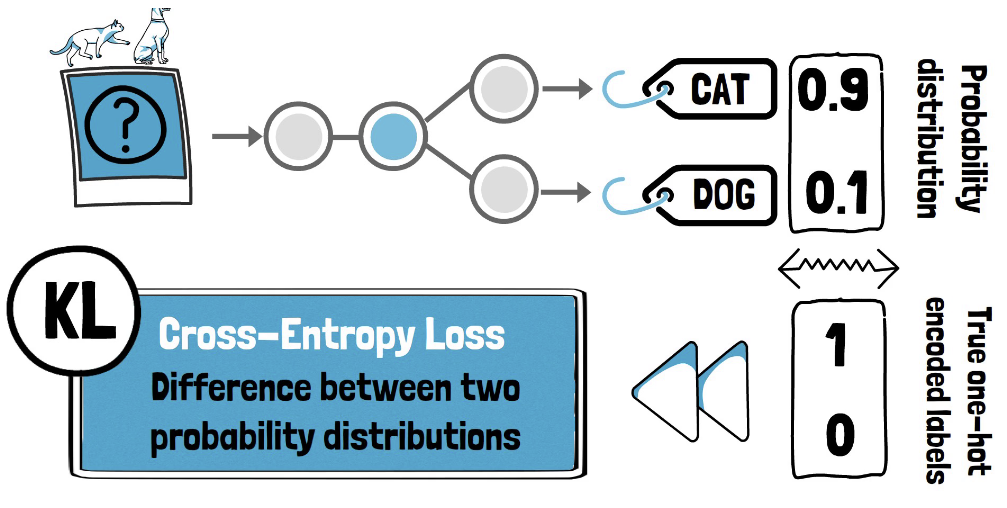

In [ ]:
# One hot encoded target label
y = torch.tensor([[0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]) # Randomly marked just for pedagogy

loss = F.cross_entropy(y_hat, y)
loss

tensor(2.2069, grad_fn=<DivBackward1>)

In [ ]:
loss.backward(retain_graph=True)
for name, param in model.named_parameters():
    print(name, param.grad)

Layer1.weight tensor([[ 0.0000,  0.0000, -0.0000,  ..., -0.0000, -0.0000,  0.0000],
        [ 0.0016,  0.0023, -0.0026,  ..., -0.0012, -0.0020,  0.0018],
        [ 0.0000,  0.0000, -0.0000,  ..., -0.0000, -0.0000,  0.0000],
        ...,
        [-0.0452, -0.0652,  0.0739,  ...,  0.0342,  0.0578, -0.0515],
        [ 0.0092,  0.0132, -0.0150,  ..., -0.0069, -0.0117,  0.0104],
        [ 0.0000,  0.0000, -0.0000,  ..., -0.0000, -0.0000,  0.0000]])
Layer1.bias tensor([ 0.0000,  0.0023,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000, -0.0282,  0.0000,  0.0001, -0.0469,  0.0000,  0.0000,  0.0060,
         0.0000,  0.0000,  0.0000, -0.0081,  0.0223, -0.0213,  0.0266,  0.0000,
         0.0000,  0.0129,  0.0000,  0.0000,  0.0000, -0.0294,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000, -0.0206,  0.0000, -0.0158,  0.0088,  0.0000,
         0.0073,  0.0000,  0.0000,  0.0000,  0.0000, -0.0379,  0.0007,  0.0370,
         0.0000,  0.0322,  0.0000,  0.0277,  0.0088,  0.0000

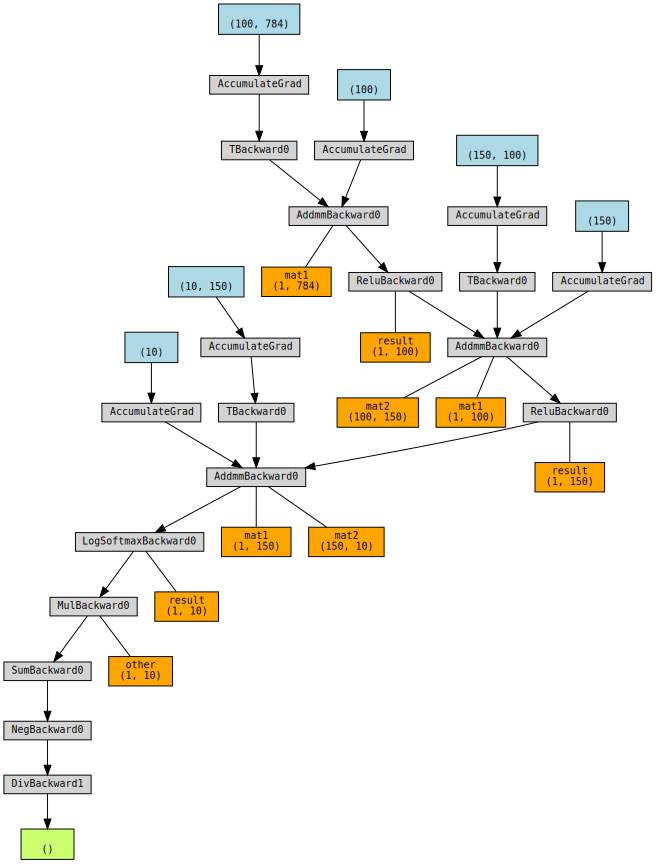

In [ ]:
make_dot(loss, show_attrs=False, show_saved=True)

## Visualize the forward pass

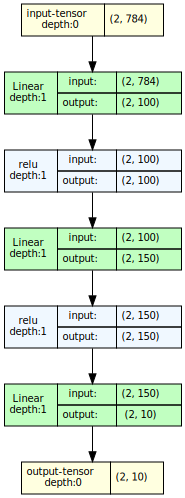

In [ ]:
from torchview import draw_graph
batch_size = 2
model_graph = draw_graph(model, input_size=(batch_size, 28*28), device='meta')
model_graph.visual_graph